In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from glob import glob

list_of_maps = sorted(glob('/Odyssey/private/t22picar/data/sst_L4/mur/*.nc'))
#list_of_maps = sorted(glob('/Odyssey/private/t22picar/data/sst_L4/mur/20190321090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'))

#list_of_maps = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01.nc"
maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

#folder_data = "/Odyssey/private/t22picar/data/sst_L4/mur/"
#file_obs = "20190101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"
#maps = xr.open_dataset(folder_data+file_obs)

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_2020_15m/"
file_glorys_4th = "glorys_15.81m_2020-01-20-2021-04-20_4th.nc"
maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_glo_4th.lat.min(), stop=maps_glo_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_glo_4th.lon.min(), stop=maps_glo_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


In [2]:
maps_sst = maps.coarsen(lat=20,lon=20,boundary="pad").mean()

In [3]:
maps_sst

<xarray.Dataset> Size: 26GB
Dimensions:           (time: 366, lat: 900, lon: 1800)
Coordinates:
  * time              (time) datetime64[ns] 3kB 2019-01-01T09:00:00 ... 2020-...
  * lat               (lat) float32 4kB -89.89 -89.69 -89.5 ... 89.5 89.71 89.9
  * lon               (lon) float32 7kB -179.9 -179.7 -179.5 ... 179.7 179.9
Data variables:
    analysed_sst      (time, lat, lon) float64 5GB dask.array<chunksize=(1, 51, 102), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 5GB dask.array<chunksize=(1, 51, 102), meta=np.ndarray>
    mask              (time, lat, lon) float32 2GB dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 5GB dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] 5GB dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float64 5GB dask.array<chunksize=(204, 51, 102), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

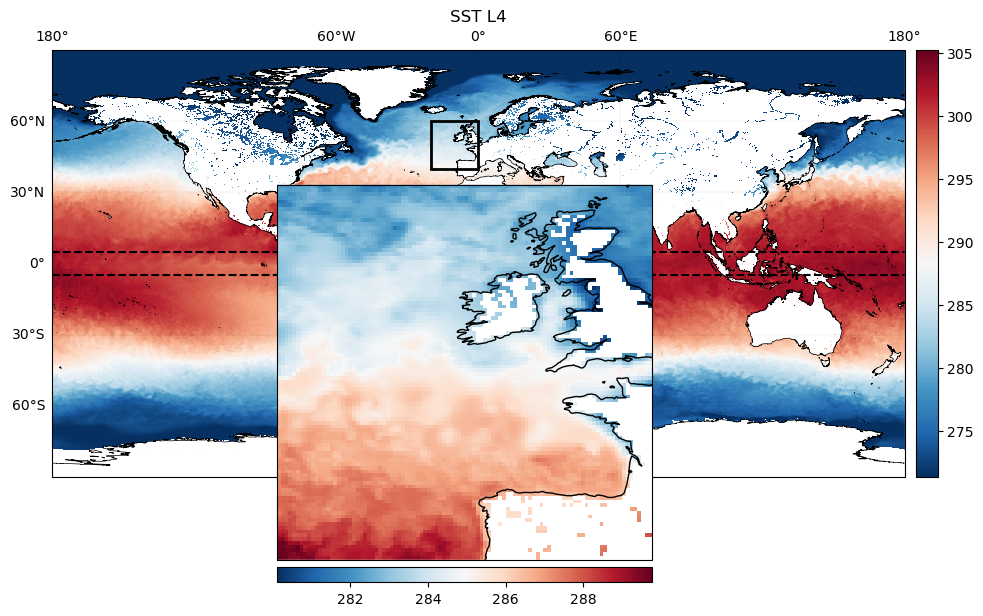

In [4]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_sst.analysed_sst[0],maps_sst.lon,maps_sst.lat,title="SST L4")

In [5]:
maps_4th = regrid_da(new_sizes,maps_sst)

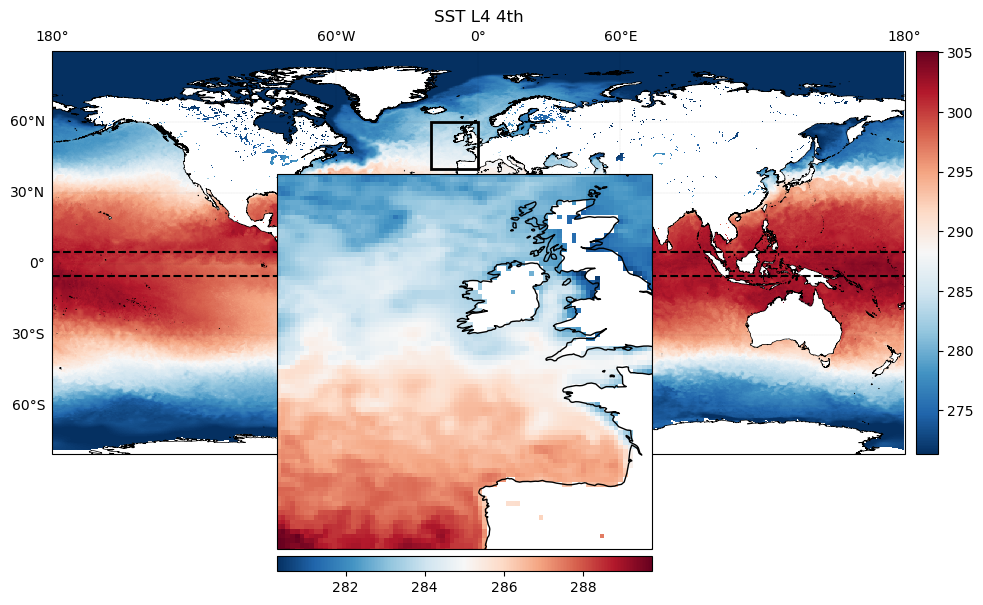

In [6]:

plot_map_zoom(maps_4th.analysed_sst[0],maps_4th.lon.values,maps_4th.lat.values,title="SST L4 4th")

In [7]:
maps_4th

<xarray.Dataset> Size: 13GB
Dimensions:           (time: 366, lat: 680, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 3kB 2019-01-01T09:00:00 ... 2020-...
  * lat               (lat) float64 5kB -80.0 -79.75 -79.5 ... 89.5 89.75 90.0
  * lon               (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.7 179.9
Data variables:
    analysed_sst      (time, lat, lon) float64 3GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 3GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    mask              (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 3GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float64 3GB dask.array<chunksize=(204, 680, 1440), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [8]:
maps_4th = maps_4th.rename({"analysed_sst": "thetao"})

In [9]:
maps_4th['thetao'] = maps_4th['thetao'] - 273.15

In [10]:
maps_4th = maps_4th.drop_vars("analysis_error").drop_vars("mask").drop_vars("sea_ice_fraction").drop_vars("sst_anomaly")


In [12]:
maps_4th

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 366, lat: 680, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2019-01-01T09:00:00 ... 2020-01-01T09:...
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    thetao   (time, lat, lon) float64 3GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [ ]:
# save data 
save_file="sst_mur_2019_4th_filter.nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_4th.to_netcdf(f"/Odyssey/private/t22picar/data/sst_L4/{save_file}")


In [13]:
folder_data = "/Odyssey/private/t22picar/data/sst_L4/"
file_obs = "sst_mur_2019_4th_filter.nc"
maps = xr.open_dataset(folder_data+file_obs)


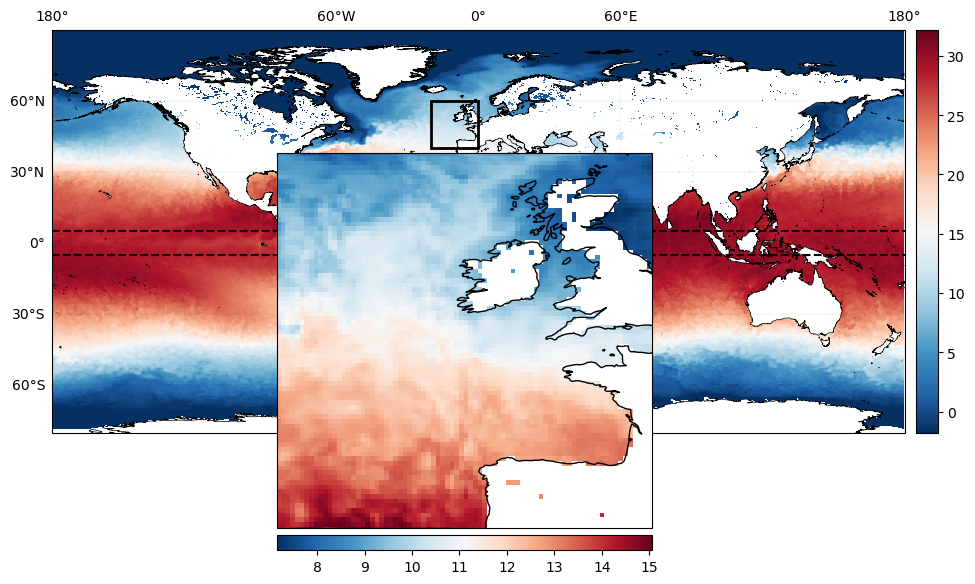

In [19]:
plot_map_zoom(maps.thetao[100],maps.lon,maps.lat)